# Central limit theory

In [24]:
import scipy.stats as sts
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# uniform
pop = np.random.uniform(0, 1, 10000)
pLen = len(pop) 
nSamples = 1000
nSize = 100
sMean = np.zeros(nSamples)
sStd = np.zeros(nSamples)
for i in range(nSamples):
  idx = np.random.randint(0,pLen,size=nSize)
  iSample = pop[idx]
  sMean[i] = np.mean(iSample)
  sStd[i] = np.std(iSample)
plt.figure()
plt.subplot(121)
sns.distplot(pop)
str = 'uniform, mean=%.2f, std=%.2f'%(np.mean(pop), np.std(pop))
plt.title(str)
plt.subplot(122)
sns.distplot(sMean)
str = 'n=%d, mean=%.2f, std=%.2f'%(nSize, np.mean(sMean), np.std(sMean))
plt.title(str)
plt.tight_layout()

# normal 
pop = np.random.normal(0, 1, 10000)
pLen = len(pop) 
nSamples = 1000
nSize = 100
sMean = np.zeros(nSamples)
sStd = np.zeros(nSamples)
for i in range(nSamples):
  idx = np.random.randint(0,pLen,size=nSize)
  iSample = pop[idx]
  sMean[i] = np.mean(iSample)
  sStd[i] = np.std(iSample)
plt.figure()
plt.subplot(121)
sns.distplot(pop)
str = 'normal, mean=%.2f, std=%.2f'%(np.mean(pop), np.std(pop))
plt.title(str)
plt.subplot(122)
sns.distplot(sMean)
str = 'n=%d, mean=%.2f, std=%.2f'%(nSize, np.mean(sMean), np.std(sMean))
plt.title(str)
plt.tight_layout()

# uniform 
pop = np.random.uniform(0, 1, 10000)
pLen = len(pop) 
nSamples = 1000
nSize = 9
sMean = np.zeros(nSamples)
sStd = np.zeros(nSamples)
for i in range(nSamples):
  idx = np.random.randint(0,pLen,size=nSize)
  iSample = pop[idx]
  sMean[i] = np.mean(iSample)
  sStd[i] = np.std(iSample)
plt.figure()
plt.subplot(121)
sns.distplot(pop)
str = 'uniform, mean=%.2f, std=%.2f'%(np.mean(pop), np.std(pop))
plt.title(str)
plt.subplot(122)
sns.distplot(sMean)
str = 'n=%d, mean=%.2f, std=%.2f'%(nSize, np.mean(sMean), np.std(sMean))
plt.title(str)
plt.tight_layout()

# normal 
pop = np.random.normal(0, 1, 10000)
pLen = len(pop) 
nSamples = 1000
nSize = 9
sMean = np.zeros(nSamples)
sStd = np.zeros(nSamples)
for i in range(nSamples):
  idx = np.random.randint(0,pLen,size=nSize)
  iSample = pop[idx]
  sMean[i] = np.mean(iSample)
  sStd[i] = np.std(iSample)
plt.figure()
plt.subplot(121)
sns.distplot(pop)
str = 'normal, mean=%.2f, std=%.2f'%(np.mean(pop), np.std(pop))
plt.title(str)
plt.subplot(122)
sns.distplot(sMean)
str = 'n=%d, mean=%.2f, std=%.2f'%(nSize, np.mean(sMean), np.std(sMean))
plt.title(str)
plt.tight_layout()


In [25]:
x1 = sts.norm.cdf(124.7, loc=100, scale = 15)
x2 = sts.norm.ppf(q=0.95, loc=100, scale=15)
x3 = 1 - sts.norm.cdf(120, loc=100, scale=15)
print([x1, x2, x3])

[0.9501867103688859, 124.67280440427209, 0.09121121972586788]


In [26]:
x = 1-sts.chi2.cdf(19.58, 2)
x

5.600889727153113e-05

## Python implementation of Chi-square test
The test is applied when you have two categorical variables from a single population. It is used to determine whether there is a significant association between the two variables.

For example, in an election survey, voters might be classified by gender (male or female) and voting preference (Democrat, Republican, or Independent). We could use a chi-square test for independence to determine whether gender is related to voting preference

<b>running-chi-square-tests-in-python-with-die-roll-data</b>

In [27]:
from scipy import stats
import numpy as np
my_rolls_actual = np.array([3, 7, 5, 8, 1, 6])
rolls_total = my_rolls_actual.sum()
my_rolls_expected = rolls_total*np.ones((6,))*(1/6)

chi_squared_stat = (((my_rolls_actual-my_rolls_expected)**2)/my_rolls_expected).sum()
print(chi_squared_stat)

6.800000000000001


In [28]:
crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 5)   # Df = number of variable categories - 1
print("Critical value")
print(crit)
p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=5) # Find the p-value
print('p_value=%.5f'%p_value)

if p_value<0.05:
    print('Reject H0')
else:
    print('Accept H0')

# another function
result = stats.chisquare(f_obs= my_rolls_actual,   # Array of observed counts
                f_exp= my_rolls_expected)   # Array of expected counts
print(result)


Critical value
11.070497693516351
p_value=0.23594
Accept H0
Power_divergenceResult(statistic=6.800000000000001, pvalue=0.23594453769452098)


## Python implementation of ks-test
The Kolmogorov–Smirnov tests if a sample distribution fits a cumulative distribution function (CDF) of are referenced distribution.

Or, if the CDF between of two different samples fit each other.

Null hypothesis for our sample is the distribution is identical to the other distribution we’re testing it against.

In [29]:
import numpy as np
import seaborn as sns
import scipy.stats as sts
import math
import matplotlib.pyplot as plt

# compute cdf
def mycdf(datalist):
  N = len(datalist)
  b = np.sort(datalist)
  cdf = np.arange(0,N)/N
  return b, cdf

# comput p-value for ks distribution
def ksprob(d,n1,n2):
  ne = float(n1*n2)/float(n1+n2)
  nesq = math.sqrt(ne)
  alam = (nesq+0.12+0.11/nesq)*d
  
  fac = 2.0
  sum = 0.0
  termbf = 0.0
  a2 = -2.0*alam*alam
  for j in range(1,101):
    term = fac*math.exp(a2*j*j)
    sum += term
    if math.fabs(term) <= 0.001*termbf or math.fabs(term) <= 1.0e-8*sum:
        return sum
    fac = -fac
    termbf = math.fabs(term)
  return 10.0

# ks test - 2sample
def mykstest(datalist1, datalist2):
  n1 = len(datalist1)
  n2 = len(datalist2)
  bin1, cdf1 = mycdf(datalist1) 
  bin2, cdf2 = mycdf(datalist2)

  j1,j2,d,fn1,fn2 = [0, 0, 0.0, 0.0, 0.0]
  while j1<n1 and j2<n2:
      d1 = bin1[j1]
      d2 = bin2[j2]
      if d1 <= d2:
          fn1 = cdf1[j1]
          j1+=1
      if d2 <= d1:
          fn2 = cdf2[j2]
          j2+=1
      dtemp = math.fabs(fn2-fn1)
      if dtemp>d:
          d=dtemp

  prob = ksprob(d,n1,n2)
  return d,prob

# mykstest vs ks_2samp
x1 = np.random.normal(0,1,10000) 
x2 = np.random.lognormal(0,1,10000)
print(mykstest(x1,x2))
print(sts.ks_2samp(x1,x2))

b1,cdf1 = mycdf(x1)
b2,cdf2 = mycdf(x2)
plt.plot(b1,cdf1)
plt.plot(b2,cdf2)
plt.legend(['normal','lognormal'])
plt.title('CDF')

# ks_2samp vs kstest
x3 = np.random.normal(3,5,10000) 
print(sts.ks_2samp(x1,x3))
print(sts.kstest(x1,'norm', args=(3, 5)))
b1,cdf1 = mycdf(x1)
b2,cdf2 = mycdf(x3)
plt.figure()
plt.plot(b1,cdf1)
plt.plot(b2,cdf2)
plt.legend(['normal(0,1)','normal(3,5)'])
plt.title('CDF')

(0.5334, 0.0)
KstestResult(statistic=0.5334, pvalue=0.0, statistic_location=0.1259852048791245, statistic_sign=1)
KstestResult(statistic=0.5685, pvalue=0.0, statistic_location=1.9030871429922631, statistic_sign=1)
KstestResult(statistic=0.5607706933528989, pvalue=0.0, statistic_location=1.866510198625188, statistic_sign=1)


Text(0.5, 1.0, 'CDF')

## Shapiro-Wilk test
The null hypothesis of the test is the data is normally distributed.

In [30]:
import numpy as np
import seaborn as sns
import scipy.stats as sts
import matplotlib.pyplot as plt

x1 = np.random.normal(0,1,2000)
x2 = np.random.normal(3,500,2000)
x3 = np.random.lognormal(0,1,2000)
print(sts.shapiro(x1))
print(sts.shapiro(x2))
print(sts.shapiro(x3))

ShapiroResult(statistic=0.9984899808991713, pvalue=0.0691356063627606)
ShapiroResult(statistic=0.9991847182103297, pvalue=0.5340981185307861)
ShapiroResult(statistic=0.5062958533207254, pvalue=2.1358346324163643e-59)


## impact of sample size on the power of hypothesis testing

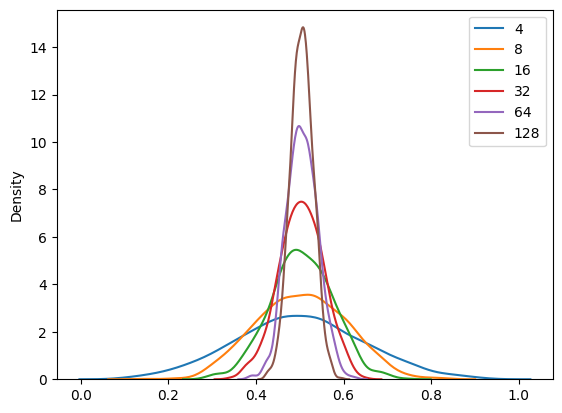

In [31]:
import scipy.stats as sts
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# uniform
pop = np.random.uniform(0, 1, 10000)
pLen = len(pop) 
nSamples = 1000
nnSize = [4, 8, 16, 32, 64, 128]
for nSize in nnSize:
  sMean = np.zeros(nSamples)
  sStd = np.zeros(nSamples)
  for i in range(nSamples):
    idx = np.random.randint(0,pLen,size=nSize)
    iSample = pop[idx]
    sMean[i] = np.mean(iSample)
    sStd[i] = np.std(iSample)
  sns.distplot(sMean,kde=True, hist=False, norm_hist=True)
  plt.legend(nnSize)
  

## Using python to compute p-value





In [32]:
x1 = sts.norm.cdf(124.7, loc=100, scale = 15)
x2 = sts.norm.ppf(q=0.95, loc=100, scale=15)
x3 = 1 - sts.norm.cdf(120, loc=100, scale=15)
print([x1, x2, x3])

[0.9501867103688859, 124.67280440427209, 0.09121121972586788]


In [33]:
x = 1-sts.chi2.cdf(19.58, 2)
print(x)

5.600889727153113e-05
